<a href="https://colab.research.google.com/github/tatianaklyueva/nlp/blob/main/Recenze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikace recenzí
Tento notebook byl připraven v rámci předmětu "Trendy a novinky v business analytice I", Vysoká škola ekonomická v Praze.

Autoři:
- Maria Babak,
- [Petr Hollmann](https://github.com/phollmann1997/),
- [Tatiana Kliueva](https://github.com/tatianaklyueva/)
- Tomáš Koťara,
- Natalie Musilová,
- Manh Tuan Nguyen.



# Úvod
Uživatelské recenze jsou velice důležitým rozhodovacím faktorem při výběru služby nebo produktu.​

Klient často potřebuje z recenzí získat specifickou informaci, například jaká je kvalita wifi v ubytování, v jakém stavu je kuchyně, nebo jaká je dopravní dostupnost. Tyto informace není jednoduché dohledat, a při manuálním pročítání recenzí to zabere poměrně dost času. 

V našem řešení aplikujeme NLP model, který v uživatelských recenzích hledá cílové slova (na základě zadání od uživatele) a následně zhodnotí sentiment vět, ve kterých se cílová slova nacházejí​.

Řešení pracuje s recenzemi uživatelů ubytování. Cílové slovo pro účely tohoto dema bylo zvoleno "wifi".

Při přípravě řešení jsme použili tyto zdroje:
-  [Trip Advisor Hotel Reviews](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews?resource=download) 
- materiály [spaCy bloc](https://drive.google.com/drive/folders/1aXK1kXYgznppa2hf53jdNBk1Al8UuVUV) Author: Filip Vencovský, Vysoká škola ekonomická v Praze
- dokumentace knihovny spaCy a usage guide [spaCy 101](https://drive.google.com/drive/folders/1aXK1kXYgznppa2hf53jdNBk1Al8UuVUV)
 



# Návrh vizualizace

Náš projekt představuje aplikaci pro lepší hledání ubytování. Může to být mobilní aplikace (obrázek níže) nebo rozšíření do webového prohlížeče.

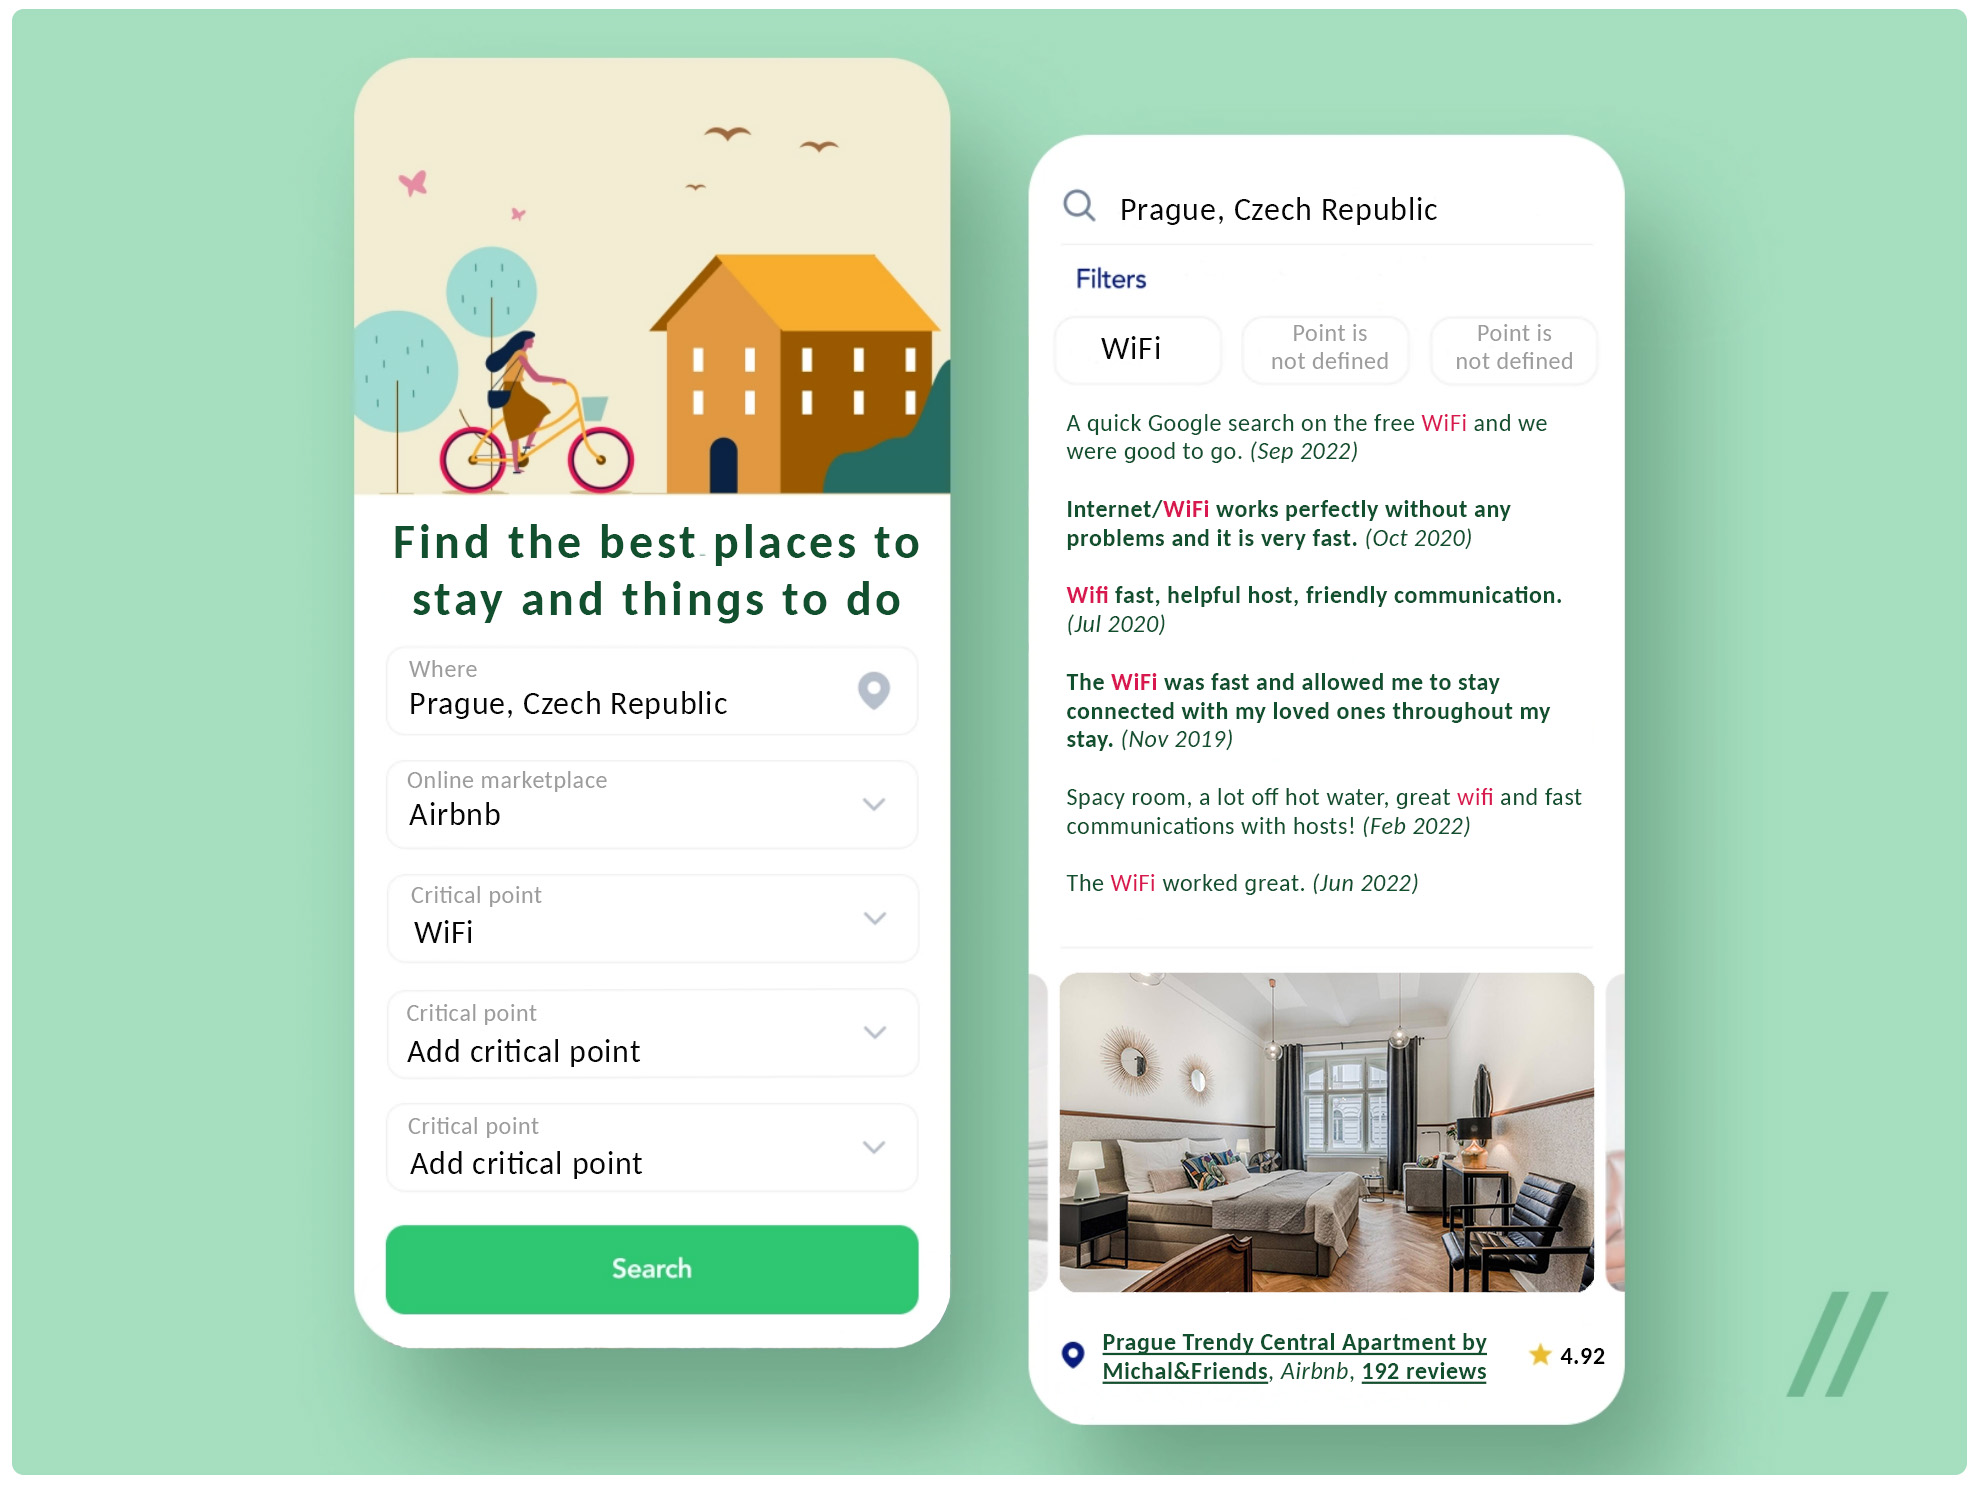


Například na první stránce hledáme ubytování v Praze.
Zvolíme ubytovací platformu (např. Airbnb, Booking, Hotels atd.).
Taky by mohlo jít prohledávat na všech dostupných platformách (Pole by uživatel nechal nevyplněné).

Dále je zvolen critical point. Lze zvolit až 3 pointy (muže to být Wifi, Bathroom, Cleanliness, Noise, Locality apod.).

Po kliknutí na tlačítko Search jsme přesměrování na druhou stránku.
Nahoře je místo, kde je vybraná lokalita a uživatelem zvolené critical pointy.
Pod tím jsou výsledné věty z recenzí týkající se critical pointů.
Critical pointy jsou označeny tučně.

Po kliknutí na nějakou větu se objeví ubytovaní dole, ke kterému věta patří.
Lze taky rolovat ubytování: doprava a doleva.

Se změnou ubytování se objevují věty nad ním, které k ubytování patří.
Popis u ubytování funguje jako odkaz na stránku Airbnb, na které lze provést objednávku.

Hodnota s počtem recenzí taky funguje jako odkaz na originální recenze.
Oboje může být zdrojem přijmu pro provozovatele appky.
Také je tam i datum recenze. To je proto, aby uživatel mohl vidět případnou změnu a rozhodovat se jen na základě novějších hodnocení.

# Příprava dat

## Obdržení zadání od uživatele

Jaké jsou filtry pro hledaní a jaké jsou critical points - co bude naše aplikace kontrolovat.

Zadání pro demo ukázku. Náš šestičlenný tým chce vyhledat apartmán v Praze pro společnou práci nad úkolem.

Náš critical point bude "wifi" - potřebujeme dobré připojení k internetu pro práci.

In [ ]:
critical_points = ['wifi']

## Získání dat

Pro náš účel jsme vybrali recenze na 10 apartmánů z Airbnb.
V plné verzi by byli recenze z Airbnb nebo jiných portálů získávány skrze API jednotlivých portálů. Aplikace by mohla fungovat na spolupráci s ubytovacími portály.

In [ ]:
apt_1 = ["""Praha Trendy Central Apartment by Michal&Friends""",
         """We had a really week at Michals apartment in Prague. The location is really good, you don't even need to use the tram. 
There was a book full of tips for Prague, which were helpful. 
The only thing we'd find yo criticize is the wifi, it is very slow. But all in all it was really great.""",
"""Everything was good. Only thing is the wifi signal strength is not strong enough to reach the bedrooms.
""",
"""the apartment is very beautiful, comfortable, clean! Fresh repairs both in the apartment and in the whole apartment houses.
there is everything that you may need and even more! took care of everything, to the smallest detail. 
convenient settlement system that allows you to go at any time. to the Old Town Square, half an hour on foot, or on Uber in 10 minutes and 100 CZK. free parking!! 
This is great, as the parking in the center is expensive. in general, everyone is very happy! recommend""",
"""We had a great stay at the apartment. It is a modern, clean space and tram, supermarket and places to eat are within walking distance""", 
"""Michal and friends’ apartment was comfy and clean. We had a lovely stay. Their guidebook and its recommendations was so helpful.
Finding the keys was a unique experience, felt like scape room :)
Highly recommended!""", 
"""Great apartment, great location, very quiet, comfortable beds, could not ask for more. Perfect stay in Prague.""", 
""" Beautiful and clean apartment in upscale building just outside (but within walking distance of) the busy old-city center.
Friendly and prompt communication from host. Easy check-in.""", 
"""The apartment itself was very warm and cosy to enter. There was heaps of information left out about the city. The wifi worked 60% of the time, but it was enough.""", 
"""Nice tv with netflicks available to watch at night which was good. Free wifi which was very handy to have. We were met on arrival by Misa and she was very welcoming and friendly.""", 
"""Great place to stay! Fantastic location (I was especially surprised how quiet it was outside, even though there was tons of stuff to do/eat/see nearby) and WiFi worked terribly for working remotely.Clean and comfortable.The outdoor space is bigger than I realized and has great views."""]

apt_2 = ["""Big 4-bedroom flat, terrace with great Vítkov view""",
""" Nice room, pretty far from the city. Spacy room, a lot off hot water, great wifi and fast communications with hosts! """, 
""" Just an amazing Airbnb. It’s actually nicer than it seems in the photos and was a great place to stay as 
it was a close walk to the underground for access to all parts of the city.
 """, 
"""The apartment was large and very comfortable with everything needed for a great stay including great wifi and super comfortable bed. The self check in was easy and Magdalena responded to our inquiries quickly.""", 
""" It is a super nice apartment with a balcony where all four of us could sit. Really good beds. 
Good coffee machine. Very effective communication with the landlord. """, 
""" We had a great time at Nick and Jenny’s appartement. The check-in was very nice and very flexible. 
I arrived very early before the check-in time but check-in was possible. 
We had some problems to find the appartement at the beginning as there was a problem with the address and the map on Airbnb.
 But due to the great communication that was not a problem at all. 
The appartement was very clean and spacious. We had a great time and would rent again. 
Public transportation and a supermarket is very close by, so you are in the city center very quick. """, 
""" 4 real bed rooms with double beds + living room with big balcony and kitchen. Locks are working with codes. 
We were 5 people there and the place worked perfectly for us! 
The area is good and not full of tourists but still only a few stops by tram from the city center """, 
""" Great location. Magdalena & Tomas was helpful & prompted response. Will definitely recommend to others! 
The only thing was wifi connection was inconsistent on the 1st day. It was OK upon spoken with the host 
Unfortunately a few things are misadvertised - for one, the location is a good mile away from the advertised location, 
and the 'Hot tub' is essentially an enhanced bathtub (think personal use as opposed to social space). 
All said we were very impressed with the apartment and had a lovely time - we just wished that it was advertised faithfully! """, 
""" Very big and clean apartment, with great view. 4 sleeping rooms with nice beds. We enjoy it. """,
"""We enjoyed the singing that came wafting in through the windows in the morning, 
while getting ready in comfort at the dressing table and walk-in closet! 
A few things to note: no shampoo or shower gel is provided, so bring your own. 
The wifi came and went and we weren’t able to find the router to try to fix it.""",
""" We really enjoyed our stay. The apartment is great value for money, spacious, and in a good location. 
There are plenty of restaurants and amenities nearby, and the city centre is readily accessible by public transport,
 taxi (5-10 min) or even on foot. We would definitley stay here again! """,
"""The location is perfect. Right beside the Charles Bridge. The supermarket was a 2 min walk. 
The cafe downstairs was very charming. Magdalena's artwork was beautiful. The wifi connection was fantastic as well. """
]

apt_3 = ["""Two Bedroom Chic in Center Prague""",
"""A very beautiful, practical and clean apartment, situated very nicely: everything was close, nice restaurants, shopping mall and supermarket within few minute walking distance. Also the main sights were within walking distance as well.""", 
"""We had a really nice stay and our host even arranged us a taxi ride from airport. One minus though: the wifi didn't work at all during our stay, and when I asked about it, I never got an answer regardless our host had read the message.""",
"""The apartment itself is not as big as it looks from the picture but it is very modern and clean. It is actually suitable for 4 adults only, can be more but it's gonna be cramp. If you sleep in the mezzanine, you have to be careful because of the low ceiling. The wifi is working very well.""", 
"""The beds are very comfortable and the house had every amenity we needed (except a washing machine). The wifi was very slow).""", 
"""We were given some incorrect/outdated information (street parking was not free on weekends and more expensive than we were told, and a recommended restaurant was closed).""", 
"""Very clean apartment in the city center! The communication and arrival was very good.""", 
"""The apartment was clean, well-decorated, and in a great central location.""",
"""We had some difficulties communicating with Riad and coordinating check in, check out, and parking.""",
"""We were given some incorrect/outdated information (street parking was not free on weekends and more expensive than we were told, and a recommended restaurant was closed).""",
"""Wifi was also pretty spotty. However, the location was really great.""",
"""Staying in Marks apartment was a great experience! He ownes more apartments in the building so it's not his private flat of course. The interior is stylish IKEA based and was very new and clean. The bathroom was equipped with a hair dryer and a really great shower! Unstable Wifi and slow internet was terrible.  """,
"""The wifi can be a little bit patchy at times, but it wasn't a big problem for us and didn't impact our stay. Thoroughly enjoyed the stay and would recommend this place."""
]
#https://www.airbnb.co.uk/rooms/2843699?adults=2&check_in=2023-02-08&check_out=2023-02-11&source_impression_id=p3_1674754697_Q9oJzyi4B5WxQFTp
apt_4 = ["""Bright Cosy Apt. near The Charles Bridge""",
"""Apartment is really nice, can recommend to everybody. There was two minus in our staying: WiFi did not work and our host was late for 15 minutes. All else were cool, location is fantastic, rooms are clean and stylish.""", 
"""The host was so friendly and met us for check in. They told us the best places to go on a map and were very contactable with any issues. Unfortunately the wifi didn't work for us even though we tried to reset it so that was a bit frustrating. But, we would definitely stay here again.""",
"""Location is very convenient: on the streetcar line, a nice short stroll to the bridge, right on the edge of Petrin Hill, and 2 blocks from Kampa Park. 
It's on a back street, so very quiet, but the address system is confusing, so make sure you get precise directions from Jiri (we initially went to the wrong system). 
Jiri was at home to welcome us, and very helpful with maps and tips. The apartment is spacious and well furnished. Comfortable bed. But sometimes not very fast wifi.""", 
"""It’s great place to stay. Everywhere so close to this place. Jiri was so helpful. I highly recommend his place to everyone""", 
"""Lovely place and a dream location. Easy flight of stairs for access. Really enjoyed my stay!""", 
"""Terrific place in a great location - quieter area yet a short, nice walk to many restaurants and old town. Jiri was a great host offering several local recommendations.""", 
"""We loved this charming apartment with all the space and comfy bed in an easy to access part of the city.""", 
"""We had a great stay here! Really good location close to everything, but also nice and quiet. Fast communication with Jiri as well. Would recommend!
Peer""", 
"""Amazing host, wonderful place and location and beautiful city! Worth the visit. Thank you very much. :)"""
]
#https://www.airbnb.co.uk/rooms/6218739?adults=2&check_in=2023-02-08&check_out=2023-02-11&source_impression_id=p3_1674754880_5WktkQA8CF3l698p
apt_5 = ["""Queen Bee house. Mathilda apartment""",
"""The place is as described, we stayed in the Mathilda room. beds are comfortable,the bathroom is huge, the place is a one bedroom, with a double sofa bed in the sitting room, the wifi is fast, the place is clean and super convenient. There are cafes nearby, that includes the one downstairs. There is a Lokal restaurant around the corner. it is just a minute away from the Charles Bridge and 5 minutes from Malostranska Metro Station. I definitely recommend.""", 
"""Very good location, 2 minutes walk from the bridge. The building is old, we liked it but if you look for a modern facility you might be disappointed. Great service and easy check-in and check out. Good wifi, comfortable bed and sofa, very big apartment for a couple. For the price I give 6 stars not 5.""",
"""Lenka's associate met us at the apartment, providing us with keys, info, everything we needed. The apartment was the nicest we rented in Europe this trip. Bathroom was large and well appointed. Hairdryer and supplies were present. The kitchen was small, but sufficient for our needs. Frig worked well. Wifi was perfect. It was necessary to close the insulated windows at night for quiet. While not a busy street, there were revelers out til late. It was unusually warm for Prague, so we requested a second fan, since my friend and I slept in separate rooms. It was delivered promptly and we slept very well. I would not hesitate to stay here again. The living room slide out bed was very comfortable for one adult. It was somewhere between a twin and full size. The living area was very spacious. and full of light.""", 
"""My sister and I traveled to Prague as our Christmas gift to each other in 2015 and our stay at Queen Bee took our trip to the next level. We kept calling it "our Hotel" instead of "our AirBnB" because it really did feel like one. First off, the location is unbeatable, within 2 minutes you are right on the Charles Bridge and have the vast majority of historic prague within walking distance. Her colleague Jason greeted us upon arrival and was extremely helpful. The room was very well done, newly renovated with a historic charm (the bathroom even had heated tiles). The mathilda room was perfect for two single girls and felt incredibly spacious with high ceilings. There was more than enough wifi (often the biggest challenge when traveling abroad) with not one, but 6 different routers to choose from.""", 
"""Great apartment very close to Charles Bridge. Very clean and perfect for getting round Prague’s old and new town. Easy to pick up the key from the café downstairs. Good wifi connection.""", 
"""The apartment was very nice. The location was great. Recommend this place.""", 
"""If I come to Prague again then I would love to book this place again. It's a great location, comfortable stay, nicely insulated and accessible to all means of public transport. The hosts were responsive. The books in the accomodations were helpful too.""", 
"""Good location for Prague tour! The cafe at the first floor help the guests to receive keys, leave luggage before check-in, and return keys. The room has a bathroom with bathtub which is separated from shower booth.""", 
"""A great apartment on one of Prague’s cosiest cobblestone streets. The surrounding bars brings great energy and life to the neighbourhood, and the double glassed windows shut out the noise. Highly recommend, would stay again! Wifi speed was outstanding""",
"""I had a great stay at this hotel apartment. The room was spacious and clean, and the staff was friendly and helpful. The wifi was fast and allowed me to stay connected with my loved ones throughout my stay.""",
"""The room was clean, comfortable, and well-appointed, and the staff was friendly and helpful. The location was great, and it was very convenient to have a kitchenette in the room. """
]
#https://www.airbnb.co.uk/rooms/650339976037553279?adults=2&children=0&infants=0&pets=0&check_in=2023-03-03&check_out=2023-03-05&previous_page_section_name=1000
apt_6 = ["""Cottage A River View"""
,"""Highly recommend this unit as an overnight stay! Great location, views and facilities! Door is a little hard to open, but once your in, everything is amazing! Very very comfortable"""
,"""Dana's place is cozy and quiet perfect 1 room cabin with a lovely view of the river. kitchen layout makes for easy use but it's not in the way. The mattress was very firm. The shower is a little tricky to get in and out. Dana had wonderful communication with good directions and tons of Information for our stay. waking up to the quiet and river was nice. overall a great stay!"""
,"""We had a very pleasant stay. It is a neat unit with a great view. The road to the property is unfortunately a bit rough and very narrow. A great place for a short stay."""
,"""I recently stayed at this hotel apartment and was very pleased. The room was clean and comfortable. The WiFi was little but slow and unreliable. I was able to work and stay connected throughout my stay."""
,"""I had a great stay at this hotel apartment. The room was spacious and clean, and the staff was friendly and helpful. The WiFi was fast and allowed me to stay connected with my loved ones throughout my stay."""
"""The room was clean, comfortable, and well-appointed, and the staff was friendly and helpful. The location was great, and it was very convenient to have a kitchenette in the room. """
,"""I had a wonderful stay at this hotel apartment. The room was spacious and clean, and the staff was friendly and accommodating. The location was perfect, and I loved having a kitchenette in the room."""
,"""Fully equipped cabin, very clean. Wonderful unobstructed view from every window. Would recommend! Thank you, Dana!"""
,"""The interior of the cozy and very clean cabin is very well thought of and offers all the luxury you could wish for in a small space. The only thing we didn’t love were the rather thin mattresses which just didn’t match the otherwise high standard."""
,"""Everything was perfect! Wifi fast, helpful host, friendly communication."""
]
#https://www.airbnb.co.uk/rooms/53744244?check_in=2023-02-03&check_out=2023-02-05&guests=1&adults=2&s=67&unique_share_id=b7c1bc52-5f4c-4980-9998-d3e606d6fdbc
apt_7 = ["""Fun Tiki Vibe Apartment"""
,""" Lenka's place is literally a stone throw away from the famous Charles bridge and it's the center of everything. The room is very tidy, wifi is fast, checkin and checkout is a no brainer, and the host is available on chat whenever you have question. """
,"""Great vibe to this place!!! Really, really cool spot. Great, walkable location! The Charles Bridge is literally right out the front door!!! Highly recommend this spot if you wish to walk around old-town Prague!!!"""
,"""We had a really pleasant stay. The apartment was quite small but very nice and cosy at the same time. It was clean and 'well-equipped' - wifi, towels, hair dryer, microwave etc. We had everything that we needed"""
,"""This place is cute and cosy. It’s perfect especially for a short-term stay. It’s clean and tidy and the location is everything. Could’t have found a better location than this one. Lenka is kind and the communication was great. The wifi in the hotel room was reliable and fast."""
,"""Great stay. Very clean. Amazing location. Everything works well and it’s a well stocked location. Highly recommend. The wifi was super fast and reliable."""
,"""Th stay was cool, except for the very loud construction work right outside our door, starting at 8 AM even on a Saturday."""
,"""This gem was in a great location, so close to the Charles bridge and old town. The apartment clean and had everything you needed to enjoy a comfortable stay. Lenka was friendly, responsive and checked in to make sure everything was okay with your stay. The wifi was top notch. Highly recommend staying here! """
,"""I highly recommend, very cozy place with the best location you can have. Lenka is very helpful and attentive if there is something wrong. The wifi was strong and consistent."""
,"""It’s an absolutely amazing location with everything you need. My partner and I found that the hot water in the shower didn’t last very long, but that’s not that big of a deal. The sheets and bed for my taste were very uncomfortable and I had a lot of trouble getting comfortable and my skin was itchy from the top sheet (I think just because it wasn’t soft at all). Otherwise, we had a great stay. """
,"""We had a great stay at Lenka's place. We basically walked out the door and we were in the middle of the Old Town and walking distance to everything we wanted to see. The wifi connection was average."""
]
#
apt_8 = ["""Eye Catching Old Town Apartment with balcony"""
,"""This Airbnb exceeded our expectations. It was the perfect location with a lot to do nearby and very walkable. Josef was extremely responsive and helpful. Wifi was stable and reliable."""
,"""The great space of the house and apartment and the host's care helped to create a good holiday mood. The apartment is quiet. On the first floor is a great cafe. Near - all the must-see facilities. Wifi was good. I sincerely recommend it!"""
,"""Josef’s place was fantastic! For context, there were 4 of us staying in the apartment. Something to know is that this Airbnb is set up more like a hotel than it is someone’s apartment, but that was great. One thing was that wifi didn't work first day, but Josef fix it immediatelly the day after."""
,"""The apartment was spectacularly clean and the bathroom is massive. Definitely a high recommendation for those who are traveling for few nights and are planning to explore the central tourist places of the city. If you are digital nomad and need fast wifi, this was big plus for us too."""
,"""We had an overall 100% perfect stay at Josef’s! The location is amazing - bars, cafes, restaurants are close by. You can walk everywhere by feet cause it’s never far. The flat itself has everything needed and even more, even a proper balcony. Good wifi connection also."""
,"""Lovely place in a great location. I had a smoothie at the cafe downstairs before starting my day in Prague. Josef gave me a list of great bars/restaurants and sights to see. Great experience!"""
,"""The flat is gorgeous, clean and modern inside. We were 4 in the flat, so 2 of us slept in the sofa bed. The sofa bed was already prepared by the time we arrived. Was so comfortable! Even for a sofa bed. The flat was really clean and the people in the reception so kind and helpful."""
,"""Location was fantastic, cannot fault. Air conditioning was great given the hot weather. We didn’t use the kitchen as we ate out for all meals. Bathroom excellent, water pressure great. Bed was very comfortable and large. TV not as big as expected and Netflix was not working. """
,"""Great house in a great position in the city center of Prague and efficent check in. Wifi didn't work. """
,"""Wonderful flat & cannot beat the location. Communication was excellent and checkin was a breeze!"""
]
#https://www.airbnb.co.uk/rooms/44448802?adults=2&children=0&infants=0&pets=0&check_in=2023-02-24&check_out=2023-02-26&source_impression_id=p3_1674917872_29VuRl2f6zc38sJP
apt_9 = ["""Classy studio"""
,"""We had an amazing time in the apartment. It is super stylish, clean, comfy and has everything you could wish for. From coffee to pods for the washing machine. The WiFi worked great. Even the entrance of the building is very impressive."""
,"""The apartment is lovely and well equipped with everything we needed for our stay. The location is brilliant, well within walking distance for many attractions. We couldn’t fault the apartment but our only criticism was communication as a query I raised with the host was not answered during our whole stay and check in details were not disclosed until asked. Wifi was working the whole time."""
,"""Brilliant stay and flat was spotless and well equipped . Host Vanda was amazingly kind and helpful . Flat in a great location too . Perfect for 2 people. Wifi connection was reliable and fast."""
,"""Great location everything within walking distance, super clean, what else can I say, I would definitely come back and book from this awesome apartment. Wifi was good, both speed and stability."""
,"""We had a great stay at the studio. Location is great and a lot of touristy things are at a walking distance. The only thing is that the bathroom didn't have any windows or airconditioning which made it very humid and warm, but you don't spend a lot of time there so it was fine. wifi was great."""
,"""This place is amazing and has everything you need. This was the best sleep I’ve had away from home in a long time. Cold A/C, Nespresso coffee machine, and a well equipped kitchen. Large skylights provide a natural wake up but also have blinds to block out the light and allow you to sleep in. Lots of shampoo/conditioner/body wash options and laundry detergent provided as well."""
,"""Everything was perfect. The entrance was quite comfortable and easy. The owner is always kind and helpful with everything. The home is small but very practical and super clean. It has everything you need. It's super centrical, you can go everywhere by walking."""
,"""Perfect apartment for couples. Very well located, walking distance from city center. Great decoration and has everything you will need to sleep well and explore the best in Prague. Highly recommend!"""
,"""Highly recommend!! You have all the necessary things you need for a stay and the pictures are accurate. Details in the studio are amazing. Great location and communication with one of the hosts Vanda is lovely too."""
,"""Very lovely and cozy place super close to the main station. Perfect for a weekend visit!"""
]
#https://www.airbnb.co.uk/rooms/10610426?adults=2&children=0&infants=0&pets=0&check_in=2023-02-03&check_out=2023-02-05&source_impression_id=p3_1674918174_1%2FjxYhIGa4dwkC1h
apt_10 = ["""High End Apt on Old Town Square"""
,"""Definitely a place to stay during a holiday. It is a very convenient place. A Short walk from central station. A short walk to main shopping Area and food Haven. Although very central, the Apartment is located in a very quiet Area. Very comfortable apartment to Fully rest at the end of a day with Good powerful hot shower and a big comfortable Bed. """
,"""We had a great stay in Misha's apartment. We had a great welcome from Misha who showed us around and gave us some great local advice . The apartment is modern and comfortable with great TV and WiFi and the kitchen has everything you would need, we made our breakfast there every morning . """
,"""“THIS IS NOT A HOTEL”- this is a quote from the host. I was 3 hours late to meet the host- plane delays, transportation from the airport didn’t go as planned- we were lost. Yes I should have messaged while I had wifi. We don’t use roaming. I was shouted at 3 steps into the building. The location is PERFECT The apartment is very clean, the host has her elderly father do all the cleaning he is lovely."""
,"""Amazing location! The high ceilings are wonderful. We loved staying there. The WiFi worked well. The washer was useful. Tip: For the spiral staircase to the loft, always start with your right foot on the first step when going up or down. Otherwise it is tricky. I would love to stay again."""
,"""A great, super centrally located apartment and just as described. Misha was a really responsive host and the flat has everything you’d want. Easy to walk to lots of the key sites and especially lovely at Christmas with its proximity to markets. An ideal place for a weekend away in Prague. Plus was a good Wifi connection."""
,"""Misha provided us with a driver because we arrived very late in Prague and this was very helpful. The location was wonderful very close to Christmas Market, restaurants, and other sites. We could walk all over Prague. She provided coffee and tea and honey which was a plus for me. The shower was great lots of hot water. Stable wifi."""
,"""The location of Misha’s place is top notch! You will not be disappointed. It is steps away from restaurants, the I famous clock tower and everything you need. The Christmas markets opened while we were visiting and it was so great to have a main market just steps away."""
,"""Great location, but not what you expect for a “high end apartment”, there is no room, just an adapted stage with 1.60m high and with very tight and dangerous stairs, so I preferred to sleep on the couch, but the it was not clean."""
,"""Misha was very helpful and polite. We had a delay and came in very late at night and she worked with us to get us settled and in the apartment. Fantastic location, very clean and comfortable. Shower Amenities, laundry soap, coffee and teas. Great stay in Prague!"""
,"""Perfectly located apartment with lots of thoughtful touches. Spacious living area and clean. Upstairs sleeping area was a bit tight but manageable."""
]

#https://www.booking.com/hotel/cz/questenberk.cs.html?aid=397594&label=gog235jc-1FCAEoggI46AdIBVgDaDqIAQGYAQW4AQfIAQzYAQHoAQH4AQKIAgGoAgO4AtDV2Z4GwAIB0gIkMWRlNWU0MDAtNmRlNi00NGI3LTkxMWMtODBmMmNmOWI4NjQz2AIF4AIB&sid=c84ac28060f6f59d7998bea250534a69&all_sr_blocks=7770509_207438519_2_2_0;checkin=2023-03-14;checkout=2023-03-19;dest_id=20354;dest_type=landmark;dist=0;group_adults=2;group_children=0;hapos=3;highlighted_blocks=7770509_207438519_2_2_0;hpos=3;matching_block_id=7770509_207438519_2_2_0;no_rooms=1;req_adults=2;req_children=0;room1=A%2CA;sb_price_type=total;sr_order=popularity;sr_pri_blocks=7770509_207438519_2_2_0__56180;srepoch=1674996456;srpvid=2d7659f29f6802bb;type=total;ucfs=1&#hotelTmpl
apt_11 = ["""Questenberg Hotel"""
,"""This hotel is beautiful, the staff are amazing and can't do enough, the view over a snowy Prague at breakfast was everything we hoped, totally recommend."""
,"""Hotel surpassed all expectations. A real gem and would definitely recommend to others! Fantastic location with stunning views. Staff were all very friendly and cleanliness exceptional. Superb value for money."""
,"""Perfect romantic place very nice rooms and beautiful view and an amazing restaurant near by - Malý Budha."""
,"""I liked the location it was right in a great spot. by the tram so you don’t have to walk up the hill. it was also modeled after a church which was very cool too."""
,"""Everything was exceptional. We were given a warm welcome and a tour of the hotel and information on the history of the hotel was provided"""
,"""Amazing place with beautiful view. We enjoyed so much the medieval ambiance and everything in this place."""
,"""It was almost perfectly clean, but in the bathroom we found some black hairs that werent ours."""
,"""It was beautiful and very comfortable"""
,"""Fantastic rooms, nice airconditioning that kept the room cool despite the heatwave outside. Nice staff and helpful staff."""
,"""Best location in the city, nice area, nice small hotel, really friendly and helpfull staff."""
]



## Čištění dat

## Rozdělení na věty

In [ ]:
import re
sentences = []
for i in range(1,11):
    #dynamické načítání listů s recenzemi
    apt_name =  "apt_" + str(i)
    apt_value = globals()[apt_name]
    sentences.append([])
    
    #rozdělení recenzí na jednotlivé věty - rozdělení na věty na základě . - do budoucna by tato funkce musela být robustnější
    for review in apt_value:
        single_review = re.split(r'[.]', review)
        sentences[i-1].extend(single_review)
    
    #smazání prázdných stringů 1
    sentences[i-1] = list(filter(None, sentences[i-1]))

    #čištění od mezer a odenterování
    for review in range(len(sentences[i-1])):
        condition1= sentences[i-1][review].startswith("\n")
        condition2= sentences[i-1][review].startswith(" \n")
        condition3= sentences[i-1][review].startswith(" ")
        if condition1 == True or condition2 == True:
            sentences[i-1][review] = re.sub('[\n]','', sentences[i-1][review])
        if condition3 == True:
            sentences[i-1][review] = sentences[i-1][review][1:]
    #smazání prázdných stringů 2
    sentences[i-1] = list(filter(None, sentences[i-1]))



## Uložení názvů apartmánů

In [ ]:
import pandas as pd

#Vytvoření dataframu s nadpisy apartmánů
#V rámci přípravy dat jsme se dohodli, že první věta v listu bude název apartmánu
df_apt_name = []

for sublist in sentences:
    df_apt_name.append(sublist[0])

df_apt_name = pd.DataFrame(df_apt_name, columns=['Apartment_name'])

print(df_apt_name)

                                      Apartment_name
0   Praha Trendy Central Apartment by Michal&Friends
1  Big 4-bedroom flat, terrace with great Vítkov ...
2                  Two Bedroom Chic in Center Prague
3                                    Bright Cosy Apt
4                                    Queen Bee house
5                               Cottage A River View
6                            Fun Tiki Vibe Apartment
7       Eye Catching Old Town Apartment with balcony
8                                      Classy studio
9                    High End Apt on Old Town Square


## Filtrování vět s critical point

In [ ]:

# Vytvoření dataframu vět s critical point a s informací, o který apartmán se jedná
cp_sentences = pd.DataFrame(columns=["apt_id", "apt_name", "review_id", "sentence"])
a = 0
for i in range(len(sentences)):
    apt_id = i + 1
    apt_name = df_apt_name["Apartment_name"].values[i]
    for j in range(len(sentences[i])):
        if critical_points[0] in sentences[i][j].lower():
            a = a + 1
            cp_sentences = cp_sentences.append({"apt_id": apt_id, "apt_name": apt_name, "review_id": a, "sentence": sentences[i][j]}, ignore_index=True)

In [ ]:
cp_sentences.head()

,apt_id,apt_name,review_id,sentence
0,1,Praha Trendy Central Apartment by Michal&Friends,1,The only thing we'd find yo criticize is the w...
1,1,Praha Trendy Central Apartment by Michal&Friends,2,Only thing is the wifi signal strength is not ...
2,1,Praha Trendy Central Apartment by Michal&Friends,3,"The wifi worked 60% of the time, but it was en..."
3,1,Praha Trendy Central Apartment by Michal&Friends,4,Free wifi which was very handy to have
4,1,Praha Trendy Central Apartment by Michal&Friends,5,Great place to stay! Fantastic location (I was...


# Tvorba modelu - Příprava knihovny SPACY

spaCy je open-source softwarová knihovna pro pokročilé zpracování přirozeného jazyka, napsaná v programovacích jazycích Python a Cython a publikovaná pod licencí MIT.

spaCy se zaměřuje na poskytování softwaru pro produkční využití. SpaCy využívá Thinc jako svůj backend a nabízí konvoluční modely neuronových sítí pro značkování slovních druhů, analýzu závislostí, kategorizaci textu a rozpoznávání pojmenovaných entit (NER). Předpřipravené statistické modely neuronových sítí pro provádění těchto úkolů jsou k dispozici pro 23 jazyků včetně angličtiny.

In [ ]:
# tested on spacy v3.4.3
!pip install -U spacy==3.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Potřebujeme načíst:
*   spacy pro NLP

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Nahrání jazykového modelu
Předtrénovaný model se načte pomocí funkce `spacy.load()` a uloží se do proměnné. Předtím je nutné zavolat `spacy.cli.download()` s názvem modelu.

Dostupné modely jsou zde [https://spacy.io/models/en](https://spacy.io/models/en). Vybrali jsme model `en_core_web_md`.

In [ ]:
model="en_core_web_md"
spacy.cli.download(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


Načtení modelu do proměnné

In [ ]:
nlp = spacy.load(model)

Doučení modelu na critical point

In [ ]:
cp_sentences['doc'] = cp_sentences['sentence'].apply(lambda x: nlp(x))
cp_sentences.head()

,apt_id,apt_name,review_id,sentence,doc
0,1,Praha Trendy Central Apartment by Michal&Friends,1,The only thing we'd find yo criticize is the w...,"(The, only, thing, we, 'd, find, yo, criticize..."
1,1,Praha Trendy Central Apartment by Michal&Friends,2,Only thing is the wifi signal strength is not ...,"(Only, thing, is, the, wifi, signal, strength,..."
2,1,Praha Trendy Central Apartment by Michal&Friends,3,"The wifi worked 60% of the time, but it was en...","(The, wifi, worked, 60, %, of, the, time, ,, b..."
3,1,Praha Trendy Central Apartment by Michal&Friends,4,Free wifi which was very handy to have,"(Free, wifi, which, was, very, handy, to, have)"
4,1,Praha Trendy Central Apartment by Michal&Friends,5,Great place to stay! Fantastic location (I was...,"(Great, place, to, stay, !, Fantastic, locatio..."


# Name entity recognition na našich větách

## Příklad

In [ ]:
from spacy import displacy

My potřebujeme, aby naše critical points byly využitelné, uložime je jako specialní entity - products.

In [ ]:
from spacy.training import Example
#cp_sentences['doc'][1] = Only thing is the wifi signal strength is not strong enough to reach the bedrooms.
#cp_sentences['doc'][3] = Free wifi which was very handy to have
example1 = Example.from_dict(cp_sentences['doc'][1], {"entities": ["O", "O", "O", "O", "U-PRODUCT", "O", "O", "O", "O", "O", "O", "O", "O", "O", "O", "O"]})
example1
example2 = Example.from_dict(cp_sentences['doc'][3], {"entities": ["O", "U-PRODUCT", "O", "O", "O", "O", "O", "O"]})
example2

{'doc_annotation': {'cats': {}, 'entities': ['O', 'U-PRODUCT', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['Free', 'wifi', 'which', 'was', 'very', 'handy', 'to', 'have'], 'SPACY': [True, True, True, True, True, True, True, False], 'TAG': ['', '', '', '', '', '', '', ''], 'LEMMA': ['', '', '', '', '', '', '', ''], 'POS': ['', '', '', '', '', '', '', ''], 'MORPH': ['', '', '', '', '', '', '', ''], 'HEAD': [0, 1, 2, 3, 4, 5, 6, 7], 'DEP': ['', '', '', '', '', '', '', ''], 'SENT_START': [1, 0, 0, 0, 0, 0, 0, 0]}}

Poté vytvoříme tréninkový optimalizátor pomocí funkce `create_optimizer()` volané na jazykovém modelu.


In [ ]:
optimizer = nlp.create_optimizer()

## Dotrénování modelu


Znovu analyzujeme větu a vidíme výsledky.

In [ ]:
nlp.update([example1,example2], sgd=optimizer)

{'tok2vec': 0.0, 'textcat': 0.3020118176937103}

## Úloha Name recognition

In [ ]:
doc = cp_sentences['doc'][1]
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
cp_sentences['doc'] = cp_sentences['sentence'].apply(lambda x: nlp(x))
cp_sentences.head()

,apt_id,apt_name,review_id,sentence,doc,sentiment_score,sentiment
0,1,Praha Trendy Central Apartment by Michal&Friends,1,"The only thing we'd find yo criticize is the wifi, it is very slow","(The, only, thing, we, 'd, find, yo, criticize, is, the, wifi, ,, it, is, very, slow)",0.589431,NEUTRAL
1,1,Praha Trendy Central Apartment by Michal&Friends,2,Only thing is the wifi signal strength is not strong enough to reach the bedrooms,"(Only, thing, is, the, wifi, signal, strength, is, not, strong, enough, to, reach, the, bedrooms)",0.198532,NEGATIVE
2,1,Praha Trendy Central Apartment by Michal&Friends,3,"The wifi worked 60% of the time, but it was enough","(The, wifi, worked, 60, %, of, the, time, ,, but, it, was, enough)",0.371610,NEGATIVE
3,1,Praha Trendy Central Apartment by Michal&Friends,4,Free wifi which was very handy to have,"(Free, wifi, which, was, very, handy, to, have)",0.703953,POSITIVE
4,1,Praha Trendy Central Apartment by Michal&Friends,5,"Great place to stay! Fantastic location (I was especially surprised how quiet it was outside, even though there was tons of stuff to do/eat/see ne...","(Great, place, to, stay, !, Fantastic, location, (, I, was, especially, surprised, how, quiet, it, was, outside, ,, even, though, there, was, tons...",0.916723,POSITIVE


# Příprava dat pro klasifikaci sentimentu 


### Načítání dat


Budeme pracovat s datasetem Trip Advisor Reviews,

Kopie tohoto datasetu uložena na personalním GoogleDisc, takže mohou nastat problémy s replikací.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/tripadvisor_hotel_reviews.csv')
# rename columns
df.columns = ['text', 'rating']
# create the label
df["sentiment_pos"] = df["rating"].apply(lambda x: True if x >= 3 else False)

df.head()

,text,rating,sentiment_pos
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,True
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,False
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,True
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,True
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,True


Dataset má 2 sloupce: text a sentiment (True pro pozitivní, False - pro negativní).

## Příprava slovníku kategorií pro training

spaCy očekává slovník na vstupě. Slovník musí obsahovat názvy kategorií a jejich logické hodnoty, v našem případě {'POSITIVE': True, 'NEGATIVE': False}. Připravíme slovník a uložíme jej do nového sloupce našeho dataframe s názvem `cats`.

In [ ]:
df["cats"] = [{'POSITIVE': y==True, 'NEGATIVE': y==False} for y in df["sentiment_pos"]]
df.head()

,text,rating,sentiment_pos,cats
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,True,"{'POSITIVE': True, 'NEGATIVE': False}"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,False,"{'POSITIVE': False, 'NEGATIVE': True}"
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,True,"{'POSITIVE': True, 'NEGATIVE': False}"
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,True,"{'POSITIVE': True, 'NEGATIVE': False}"
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,True,"{'POSITIVE': True, 'NEGATIVE': False}"


## Rozdělení dat pro trénink a testování

Pro nastavení podílu 80 % tréninkových a 20 % testovacích dat používáme funkci `sample`. Pro lepší reprodukovatelnost používáme parametr `random_state`. Uložili jsme 80% dat do proměnné `df_train`.

In [ ]:
df_train = df.sample(frac=0.8, random_state=6)
len(df_train)

16393

20% dat, které nejsou v df_train, bude použito pro testovaní. Uložili jsme je do proměnné `df_train`.

In [ ]:
df_test = df.drop(df_train.index, inplace=False)
len(df_test)

4098

## Příprava a uložení příkladů
Začneme analýzou dokumentů přes nlp pipeline pomocí funkce `pipe()` na načteném jazykovém objektu.

In [ ]:
with nlp.select_pipes(enable="tok2vec"):
  generator = nlp.pipe(df_train["text"])
  train_docs = list(generator)
  generator = nlp.pipe(df_test["text"])
  test_docs = list(generator)
train_docs[0]

loved hotel said rooms small right mind stay room trip room itself-it floor not near elevator/lift quiet, people complaining ac rooms just switched bad, room clean cleaned morning bathroom carpet bit worn bathroom clean remember reading moaning shower water cold temperature gage wall right light switch, just let hot tap sink run great stay recommend hotel planning stay new york,  

Abychom připravili označená data pro trénování, musíme zabalit slovník sentimentu `{'POSITIVE': True, 'NEGATIVE': False}` do jiného slovníku s klíčem `cats`.

`{'cats': {'NEGATIVE': True, 'POSITIVE': False}}`

In [ ]:
example = Example.from_dict(train_docs[0], {'cats': df_train.iloc[0]['cats']})
example

{'doc_annotation': {'cats': {'POSITIVE': True, 'NEGATIVE': False}, 'entities': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'spans': {}, 'links': {}}, 'token_annotation': {'ORTH': ['loved', 'hotel', 'said', 'rooms', 'small', 'right', 'mind', 'stay', 'room', 'trip', 'room', 'itself', '-', 'it', 'floor', 'not', 'near', 'elevator', '/', 'lift', 'quiet', ',', 'people', 'complaining', 'ac', 'rooms', 'just', 'switched', 'bad', ',', 'room', 'clean', 'cleaned', 'morning', 'bathroom', 'carpet', 'bit', 'worn', 'bathroom', 'clean', 'remember', 'reading', 'moaning', 'shower', 'water', 'cold', 'temperature', 'gage', 'wall', 'right', 'light', 'switch', ',', 'just', 'let', 'hot', 'tap', 'sink', 'run', 'g

Vytvoření příkladů a jejich uložení do binárního formátu pro budoucí trénink je posledním krokem.

Existuje objekt `DocBin` z `spacy.tokens`, který funguje jako sbírka příkladů. Příklady lze uložit do kolekce pomocí funkce `add()`. Do Binu nelze uložit celý příklad, pouze objekt dokumentu. Takže je třeba volat atribut `reference`, protože obsahuje cenné anotace.

Objekt `DocBin` je třeba zkonstruovat pomocí `DocBin()`.

Iterujeme přes rozsah `train_docs`/`test_docs` pomocí `i` a vytvořili jsme všechny příklady a uložili odkazy (reference) do Binu.

In [ ]:
from spacy.tokens import DocBin
train_bin = DocBin()

for i in range(len(train_docs)):
  example = Example.from_dict(train_docs[i], {'cats': df_train.iloc[i]['cats']})
  train_bin.add(example.reference)

train_bin.to_disk("/content/drive/MyDrive/Colab_Notebooks/train.spacy")

Stejná operace pro testovací data

In [ ]:
from spacy.tokens import DocBin
bin = DocBin()

for i in range(len(test_docs)):
  example = Example.from_dict(test_docs[i], {'cats': df_test.iloc[i]['cats']})
  bin.add(example.reference)

bin.to_disk("/content/drive/MyDrive/Colab_Notebooks/test.spacy")

# Klasifikace sentimentu


## Nastavení prostředí
Analýza tréninkových protokolů je kritickým faktorem úspěchu strojového učení. Proto jsme použili servis **[Weights and Biases](https://wandb.ai/)** , který umožňuje odesílat, ukládat a analyzovat protokoly na dálku. Před použitím v tomto notebooku je nutná registrace.

In [ ]:
# instalace balíčku: Weights and Biasis package skrze `pip`
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Přihlášení do wandb
import wandb
wandb.login()

True

## Trénování modelu

Připravíme konfiguraci

In [ ]:
config_path = "/content/drive/MyDrive/Colab_Notebooks/base_config_BOW.cfg"
!python -m spacy init fill-config $config_path config.cfg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-29 12:16:45.075637: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


Po konfigurace může začít samotný trénink.

In [ ]:
!python -m spacy train config.cfg --output /content/drive/MyDrive/Colab_Notebooks/output --paths.train /content/drive/MyDrive/Colab_Notebooks/train.spacy --paths.dev /content/drive/MyDrive/Colab_Notebooks/test.spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-29 12:16:51.314649: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory:
/content/drive/MyDrive/Colab_Notebooks/output
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-01-29 12:16:52,886] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2023-01-29 12:16:53,566] [INFO] Pipeline: ['tok2vec', 'textcat']
INFO:spacy:Pipeline: ['tok2vec', 'textcat']
[2023-01-29 12:16:53,571] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2023-01-29 12:16:53,572] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2023-01-29 12:17:31,725] [INFO] Initialized pipeline components: ['tok2vec', 'textcat']
INFO:spacy:Initialized pipeline c

## Evaluace modelu

Po každé iteraci vyhodnotíme model na testovacích datech.

Pro účely hodnocení nabízí spaCy třídu [`Scorer`](https://spacy.io/api/scorer). V případě školení CLI program zaznamenává skóre pro budoucí hodnocení.

`Scorer`pro textový kategorie vrací atributy:

   - `p` *přesnost*,
   - `r` *recall*,
   - `f` *F-skóre*,
   - `auc` **AUC** - plocha pod křivkou ROC.

In [ ]:
# úložiště pro evaluaci modelu
from pathlib import Path
output_dir = Path("eval")
if not output_dir.exists():
    output_dir.mkdir()

# evaluace modelu
!python -m spacy evaluate /content/drive/MyDrive/Colab_Notebooks/output/model-best/ /content/drive/MyDrive/Colab_Notebooks/test.spacy --output ./eval/best.json --displacy-path ./eval/

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-29 12:30:21.393602: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Using CPU

================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   88.28 
SPEED               32050 


=========================== Textcat F (per label) ===========================

               P       R       F
POSITIVE   96.87   95.61   96.23
NEGATIVE   77.68   83.18   80.33


======================== Textcat ROC AUC (per label) ========================

           ROC AUC
POSITIVE      0.96
NEGATIVE      0.96

✔ Generated 25 parses as HTML
eval
✔ Saved results to eval/best.json


## Testování modelu

Model nahráváme pomocí funkce `spacy.load`.

In [ ]:
# načtení modelu do proměnné
nlp = spacy.load("/content/drive/MyDrive/Colab_Notebooks/output/model-best/")

Používáme funkci nazvanou `evaluate`, kterou použijeme s `apply`. Jako parametry budeme očekávat řádek datového rámce `row` a jazykový model `nlp`, který vrací hodnotu v kategorii sentiment.

Do řádku (od parametru) přidáme nový sloupec `sentiment_score`, kde ukládáme předpokládanou hodnotu sentimentu. Je dostačující uložit hodnotu sentimentu `POSITIVE`, protože třídy jsou exkluzivní.


In [ ]:
def evaluate(row, nlp=nlp):
    row["sentiment_score"]=nlp(row["sentence"]).cats["POSITIVE"]    
    return row

Potřebujeme pracovat s předpokládaným sentimentem jako kategorií, takže použijeme funkci pandy `pd.cut`, která vytvoří kategorie podle zadaných binů:
- 0 - 0,4 - negativní,
- 0.4 - 0.6 - neutrální,
- 0.6 - 1 - pozitivní.

In [ ]:
cp_sentences = cp_sentences.apply(evaluate, nlp=nlp, axis=1)

cp_sentences["sentiment"] = pd.cut(cp_sentences["sentiment_score"], 
                   bins=[0,0.4,0.6,1], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
cp_sentences.sort_values(by="sentiment_score", ascending = False)

,apt_id,apt_name,review_id,sentence,doc,sentiment_score,sentiment
6,2,"Big 4-bedroom flat, terrace with great Vítkov view",7,The apartment was large and very comfortable with everything needed for a great stay including great WiFi and super comfortable bed,"(The, apartment, was, large, and, very, comfortable, with, everything, needed, for, a, great, stay, including, great, WiFi, and, super, comfortabl...",0.962057,POSITIVE
47,10,High End Apt on Old Town Square,48,"The apartment is modern and comfortable with great TV and WiFi and the kitchen has everything you would need, we made our breakfast there every mo...","(The, apartment, is, modern, and, comfortable, with, great, TV, and, WiFi, and, the, kitchen, has, everything, you, would, need, ,, we, made, our,...",0.853673,POSITIVE
28,6,Cottage A River View,29,"Everything was perfect! Wifi fast, helpful host, friendly communication","(Everything, was, perfect, !, Wifi, fast, ,, helpful, host, ,, friendly, communication)",0.828582,POSITIVE
30,7,Fun Tiki Vibe Apartment,31,"It was clean and 'well-equipped' - wifi, towels, hair dryer, microwave etc","(It, was, clean, and, ', well, -, equipped, ', -, wifi, ,, towels, ,, hair, dryer, ,, microwave, etc)",0.684918,POSITIVE
25,5,Queen Bee house,26,The wifi was fast and allowed me to stay connected with my loved ones throughout my stay,"(The, wifi, was, fast, and, allowed, me, to, stay, connected, with, my, loved, ones, throughout, my, stay)",0.679770,POSITIVE
9,2,"Big 4-bedroom flat, terrace with great Vítkov view",10,The wifi connection was fantastic as well,"(The, wifi, connection, was, fantastic, as, well)",0.659991,POSITIVE
27,6,Cottage A River View,28,The WiFi was fast and allowed me to stay connected with my loved ones throughout my stay,"(The, WiFi, was, fast, and, allowed, me, to, stay, connected, with, my, loved, ones, throughout, my, stay)",0.651360,POSITIVE
19,5,Queen Bee house,20,"beds are comfortable,the bathroom is huge, the place is a one bedroom, with a double sofa bed in the sitting room, the wifi is fast, the place is ...","(beds, are, comfortable, ,, the, bathroom, is, huge, ,, the, place, is, a, one, bedroom, ,, with, a, double, sofa, bed, in, the, sitting, room, ,,...",0.624599,POSITIVE
46,9,Classy studio,47,wifi was great,"(wifi, was, great)",0.621385,POSITIVE
33,7,Fun Tiki Vibe Apartment,34,The wifi was top notch,"(The, wifi, was, top, notch)",0.612015,POSITIVE


## Output

Potřebujeme třídit naše apartmánové recenze na základě skóre sentimentu, takže používáme funkci pivot_table.

In [ ]:
apt_rating = cp_sentences.pivot_table(index = 'apt_name', 
                                      values='sentiment_score').sort_values(by='sentiment_score', ascending=False)
apt_rating['mean_sentiment'] = pd.cut(apt_rating["sentiment_score"], 
                   bins=[0,0.4,0.6,1], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])                       
apt_rating

,sentiment_score,mean_sentiment
apt_name,,
Cottage A River View,0.629283,POSITIVE
"Big 4-bedroom flat, terrace with great Vítkov view",0.585320,NEUTRAL
High End Apt on Old Town Square,0.503369,NEUTRAL
Queen Bee house,0.497745,NEUTRAL
Classy studio,0.472535,NEUTRAL
Fun Tiki Vibe Apartment,0.430842,NEUTRAL
Praha Trendy Central Apartment by Michal&Friends,0.411242,NEUTRAL
Two Bedroom Chic in Center Prague,0.376781,NEGATIVE
Eye Catching Old Town Apartment with balcony,0.347718,NEGATIVE


Jen pro zajímavost se podíváme na nejhorší a nejlepší recenze apartmánových wifi.

In [ ]:
pd.options.display.max_colwidth = 150

cp_sentences.loc[cp_sentences['apt_name']==apt_rating.index[-1]]['sentence']

16                  There was two minus in our staying: WiFi did not work and our host was late for 15 minutes
17    Unfortunately the wifi didn't work for us even though we tried to reset it so that was a bit frustrating
18                                                                            But sometimes not very fast wifi
Name: sentence, dtype: object

In [ ]:
# Nejlepší wifi dle vyhodnocení modelem
cp_sentences.loc[cp_sentences['apt_name']==apt_rating.index[0]]['sentence']

26                                                 The WiFi was little but slow and unreliable
27    The WiFi was fast and allowed me to stay connected with my loved ones throughout my stay
28                     Everything was perfect! Wifi fast, helpful host, friendly communication
Name: sentence, dtype: object

Zdá se, že sentiment těchto recenzí je skutečně opačný. Model funguje ve většině případů podle očekávání

# Shrnutí
Cílem tohoto dema, bylo vytvořit funkční model sentimentální analýzy a to v problematice ubytování skrze portály jako jsou AirBnB, Booking a další.

Pomocí recenzí z jednotlivých apartmánů jsme vytvořili sentiment na klíčové slovo (critical point), respektive požadavek uživatele. V našem případě jsme chtěli vyhledat ubytování, které má kvalitní wifi signál (klíčovým slovem bylo "wifi").

Roztřídili jsme si všechny recenze z apartmánů na jednotlivé věty a z těchto vět vyfiltrovali pouze ty, kde je obsaženo klíčové slovo "wifi".

Z knihovny spaCy jsme vybrali model "en_core_web_md" a následně ho dotrénovali na pro naše potřeby (pro naše klíčové slovo). Model jsme poté spustili na již vyfiltrované věty s klíčovým slovem.

Model nám vytvořil skóre sentimentu pro každou větu (sentiment_score) a na základě tohoto skóre jsme vytvořili koše sentimentu - negativní (0-0.4), neutrální (0.4-0.6) a pozitivní (0.6-1). 

Sentimenty pro jednotlivé apartmány aplikace zprůměrovala a seřadila sestupně.

Pointou této aplikace je časová úspora, kdy uživatel nemusí procházet apartmán po apartmánu, ale pouze si zadá požadavky na ubytování a přijde mu výsledek v podobě seznamu apartmánů, které nejvíce odpovídají jeho požadavkům.
